In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [3]:
cancer_raw_data = pd.read_csv("cancer.csv")
cancer_raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
cancer_raw_data.shape

(569, 33)

In [5]:
cancer_raw_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
cancer_raw_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

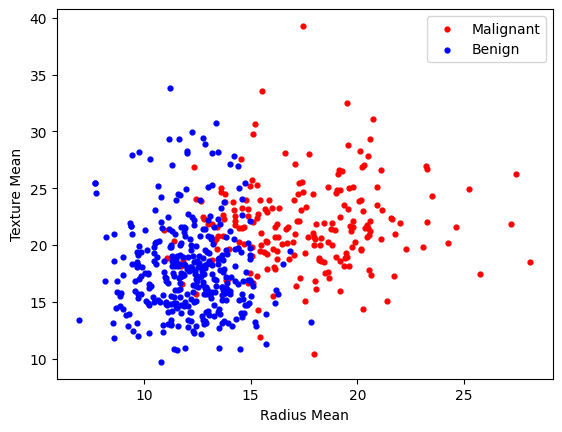

In [10]:
plt.scatter(cancer_raw_data["radius_mean"][cancer_raw_data.diagnosis == "M"],
            cancer_raw_data["texture_mean"][cancer_raw_data.diagnosis == "M"],
            c='r',
            s=12,
            marker='o',
            label="Malignant")
plt.scatter(cancer_raw_data["radius_mean"][cancer_raw_data.diagnosis == "B"],
            cancer_raw_data["texture_mean"][cancer_raw_data.diagnosis == "B"],
            c='b',
            s=12,
            marker='o',
            label="Benign")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.legend()
plt.show()
#Data is not fully linearly separable

In [12]:
label_encoder = preprocessing.LabelEncoder()
cancer_raw_data['diagnosis'] = label_encoder.fit_transform(cancer_raw_data['diagnosis'])
cancer_raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [48]:
Y = cancer_raw_data['diagnosis'].copy()
X = cancer_raw_data.loc[:, cancer_raw_data.columns != 'diagnosis'].copy()
X = X.drop('Unnamed: 32', axis=1)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [55]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred_train = gnb.predict(X_train)

In [56]:
print(f"Training Accuracy: {accuracy_score(Y_pred_train, Y_train)}")
print(f"Training Confusion Matrix: {confusion_matrix(Y_pred_train, Y_train)}")
print(f"Training F1 score: {f1_score(Y_pred_train, Y_train)}")
print(f"Training Precision Score: {precision_score(Y_pred_train, Y_train)}")
print(f"Training Recall Score:{recall_score(Y_pred_train, Y_train)}")

Training Accuracy: 0.6206030150753769
Training Confusion Matrix: [[244 146]
 [  5   3]]
Training F1 score: 0.03821656050955414
Training Precision Score: 0.020134228187919462
Training Recall Score:0.375


In [57]:
Y_pred_test = gnb.predict(X_test)

In [58]:
print(f"Testing Accuracy: {accuracy_score(Y_pred_test, Y_test)}")
print(f"Testing Confusion Matrix: {confusion_matrix(Y_pred_test, Y_test)}")
print(f"Testing F1 score: {f1_score(Y_pred_test, Y_test)}")
print(f"Testing Precision Score: {precision_score(Y_pred_test, Y_test)}")
print(f"Testing Recall Score:{recall_score(Y_pred_test, Y_test)}")

Testing Accuracy: 0.6374269005847953
Testing Confusion Matrix: [[107  61]
 [  1   2]]
Testing F1 score: 0.06060606060606061
Testing Precision Score: 0.031746031746031744
Testing Recall Score:0.6666666666666666


In [59]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
Y_pred_train = mnb.predict(X_train)
print(f"Training Accuracy: {accuracy_score(Y_pred_train, Y_train)}")
print(f"Training Confusion Matrix: {confusion_matrix(Y_pred_train, Y_train)}")
print(f"Training F1 score: {f1_score(Y_pred_train, Y_train)}")
print(f"Training Precision Score: {precision_score(Y_pred_train, Y_train)}")
print(f"Training Recall Score:{recall_score(Y_pred_train, Y_train)}")
Y_pred_test = mnb.predict(X_test)
print(f"Testing Accuracy: {accuracy_score(Y_pred_test, Y_test)}")
print(f"Testing Confusion Matrix: {confusion_matrix(Y_pred_test, Y_test)}")
print(f"Testing F1 score: {f1_score(Y_pred_test, Y_test)}")
print(f"Testing Precision Score: {precision_score(Y_pred_test, Y_test)}")
print(f"Testing Recall Score:{recall_score(Y_pred_test, Y_test)}")

Training Accuracy: 0.4020100502512563
Training Confusion Matrix: [[ 32  21]
 [217 128]]
Training F1 score: 0.5182186234817815
Training Precision Score: 0.8590604026845637
Training Recall Score:0.3710144927536232
Testing Accuracy: 0.3391812865497076
Testing Confusion Matrix: [[11 16]
 [97 47]]
Testing F1 score: 0.45410628019323673
Testing Precision Score: 0.746031746031746
Testing Recall Score:0.3263888888888889


In [61]:
cnb = ComplementNB()
cnb.fit(X_train, Y_train)
Y_pred_train = cnb.predict(X_train)
print(f"Training Accuracy: {accuracy_score(Y_pred_train, Y_train)}")
print(f"Training Confusion Matrix: {confusion_matrix(Y_pred_train, Y_train)}")
print(f"Training F1 score: {f1_score(Y_pred_train, Y_train)}")
print(f"Training Precision Score: {precision_score(Y_pred_train, Y_train)}")
print(f"Training Recall Score:{recall_score(Y_pred_train, Y_train)}")
Y_pred_test = cnb.predict(X_test)
print(f"Testing Accuracy: {accuracy_score(Y_pred_test, Y_test)}")
print(f"Testing Confusion Matrix: {confusion_matrix(Y_pred_test, Y_test)}")
print(f"Testing F1 score: {f1_score(Y_pred_test, Y_test)}")
print(f"Testing Precision Score: {precision_score(Y_pred_test, Y_test)}")
print(f"Testing Recall Score:{recall_score(Y_pred_test, Y_test)}")

Training Accuracy: 0.4020100502512563
Training Confusion Matrix: [[ 32  21]
 [217 128]]
Training F1 score: 0.5182186234817815
Training Precision Score: 0.8590604026845637
Training Recall Score:0.3710144927536232
Testing Accuracy: 0.3391812865497076
Testing Confusion Matrix: [[11 16]
 [97 47]]
Testing F1 score: 0.45410628019323673
Testing Precision Score: 0.746031746031746
Testing Recall Score:0.3263888888888889


In [64]:
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
Y_pred_train = bnb.predict(X_train)
print(f"Training Accuracy: {accuracy_score(Y_pred_train, Y_train)}")
print(f"Training Confusion Matrix: {confusion_matrix(Y_pred_train, Y_train)}")
print(f"Training F1 score: {f1_score(Y_pred_train, Y_train)}")
print(f"Training Precision Score: {precision_score(Y_pred_train, Y_train)}")
print(f"Training Recall Score:{recall_score(Y_pred_train, Y_train)}")
Y_pred_test = bnb.predict(X_test)
print(f"Testing Accuracy: {accuracy_score(Y_pred_test, Y_test)}")
print(f"Testing Confusion Matrix: {confusion_matrix(Y_pred_test, Y_test)}")
print(f"Testing F1 score: {f1_score(Y_pred_test, Y_test)}")
print(f"Testing Precision Score: {precision_score(Y_pred_test, Y_test)}")
print(f"Testing Recall Score:{recall_score(Y_pred_test, Y_test)}")

Training Accuracy: 0.6256281407035176
Training Confusion Matrix: [[249 149]
 [  0   0]]
Training F1 score: 0.0
Training Precision Score: 0.0
Training Recall Score:0.0
Testing Accuracy: 0.631578947368421
Testing Confusion Matrix: [[108  63]
 [  0   0]]
Testing F1 score: 0.0
Testing Precision Score: 0.0
Testing Recall Score:0.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
